In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# Ejercicio completo con activo libre de riesgo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf

Dada la lista de tickers en el fichero `https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python-2023/main/Tema_4_CAPM/data/tickers_ejercicio_completo.csv`, realiza los siguientes ejercicios:

1. Descarga los precios de la lista de tickers a partir del 1 de enero de 2020 y píntalos en el espacio rentabilidad-riesgo.

2. Calcula la cartera de mínimo riesgo.

3. Dibuja la frontera eficiente.

4. Calcula la cartera con riesgo máximo del 17% anual.

5. Calcula la cartera con una rentabilidad del 36% anual.

6. Si introduces el activo libre de riesgo con una rentabilidad del 1% anual, calcula de nuevo la cartera con una rentabilidad del 36% anual. Compara el riesgo de la nueva cartera con la cartera anterior. ¿Qué ha pasado?

7. Dibuja todo el procedimiento y explícalo.

**NOTA** No se permiten posiciones cortas.

In [3]:
filepath = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python-2023/main/Tema_4_CAPM/data/tickers_ejercicio_completo.csv"
tickers = list(pd.read_csv(filepath, index_col=0)["Tickers"])

In [4]:
# 1. Descarga los precios de la lista de tickers a partir del 1 de enero de 2020 y píntalos 
#    en el espacio rentabilidad-riesgo
precios = yf.download(tickers, start="2020-01-01")["Adj Close"]
retornos = np.log(precios).diff().dropna()
retornos

[*********************100%%**********************]  100 of 100 completed


,A,ABBV,ABT,AFL,AJG,AMAT,AMGN,AMP,APA,APH,...,SYY,TDG,TGT,TMO,TYL,UHS,VMC,VTR,WBA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.016186,-0.009537,-0.012266,-0.006959,-0.002096,-0.016044,-0.006812,-0.012547,0.012928,-0.010491,...,-0.003669,0.018162,-0.010445,-0.010937,0.001403,-0.002392,-0.004354,0.011987,0.000000,0.000149
2020-01-06,0.002952,0.007861,0.005226,-0.002835,0.004606,-0.021801,0.007645,0.003286,-0.001948,-0.005195,...,-0.001305,0.011973,-0.009503,0.007161,0.011477,-0.000775,-0.001761,0.010285,0.008595,-0.007707
2020-01-07,0.003060,-0.005721,-0.005575,-0.009509,-0.010815,0.028477,-0.009449,-0.012121,0.237394,0.005379,...,-0.008105,0.003755,0.001779,0.005643,0.003411,0.004010,-0.011344,-0.008359,-0.005047,0.003374
2020-01-08,0.009825,0.007062,0.004068,0.003053,0.001371,-0.000649,0.000756,0.008955,0.006744,0.002402,...,0.011542,-0.002337,-0.003236,0.001589,-0.000900,0.018435,0.007954,-0.004909,-0.060129,-0.002173
2020-01-09,0.015590,0.007678,0.002664,0.000191,0.009757,0.006313,0.002976,0.010297,-0.003980,0.003501,...,0.001182,0.016562,0.000810,0.006422,0.001285,-0.005183,0.006557,-0.005816,-0.020814,0.013192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13,-0.000135,-0.005876,-0.004981,0.010316,0.002195,-0.021604,-0.001991,0.009063,0.035004,-0.000633,...,0.004855,0.003603,-0.005385,-0.006602,-0.016041,-0.001776,-0.000965,-0.005286,-0.010867,-0.028639
2024-03-14,-0.017814,0.007423,-0.010962,-0.002748,-0.001842,0.000947,-0.016255,-0.006741,-0.002768,-0.010459,...,-0.006104,-0.001264,-0.014261,-0.013618,-0.006838,-0.008522,0.005222,-0.018840,-0.020639,-0.013425
2024-03-15,0.015512,-0.018492,-0.028678,0.009527,-0.006849,-0.010516,-0.009882,0.013294,-0.014581,-0.000732,...,0.011059,-0.011620,-0.000548,-0.001300,-0.004721,0.005594,-0.014398,-0.002586,0.009653,-0.007562


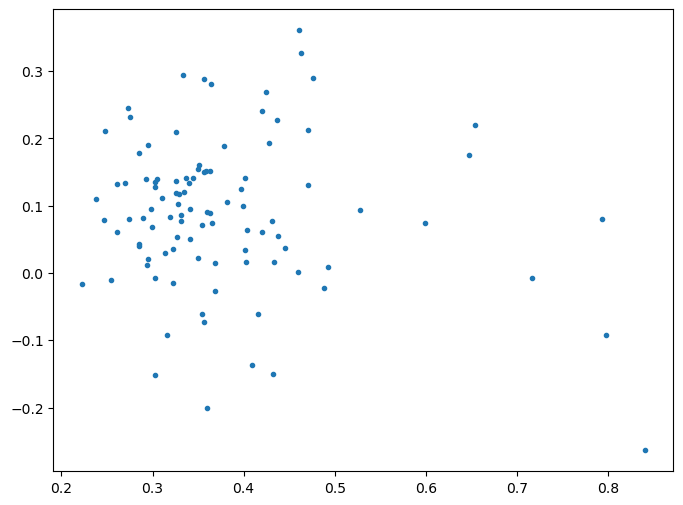

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.show()

In [6]:
# 2. Calcula la cartera de mínimo riesgo.
num_activos = len(retornos.columns)
retornos_esperados = retornos.mean().to_numpy()
matriz_cov = retornos.cov().to_numpy()

In [7]:
pesos = cp.Variable(num_activos)

restricciones = [cp.sum(pesos) == 1,
                 pesos >= 0]

rent = retornos_esperados @ pesos
riesgo = cp.quad_form(pesos, matriz_cov)

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve("ECOS")

In [8]:
pesos_min_riesgo = pesos.value
pesos_min_riesgo[pesos_min_riesgo <= 1e-4] = 0

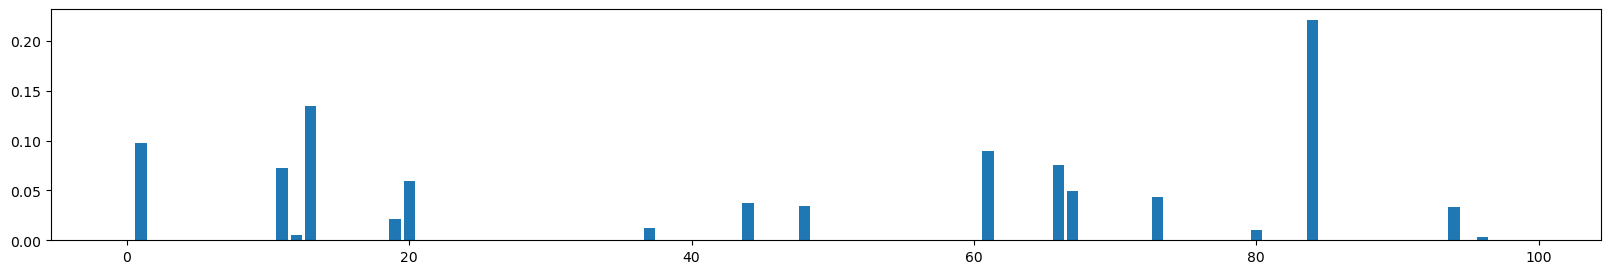

In [9]:
plt.figure(figsize=(20, 3))
plt.bar(range(num_activos), pesos_min_riesgo)
plt.show()

In [10]:
retornos_cartera = retornos @ pesos_min_riesgo
rent_min_riesgo = retornos_cartera.mean()
risk_min_riesgo = retornos_cartera.std()

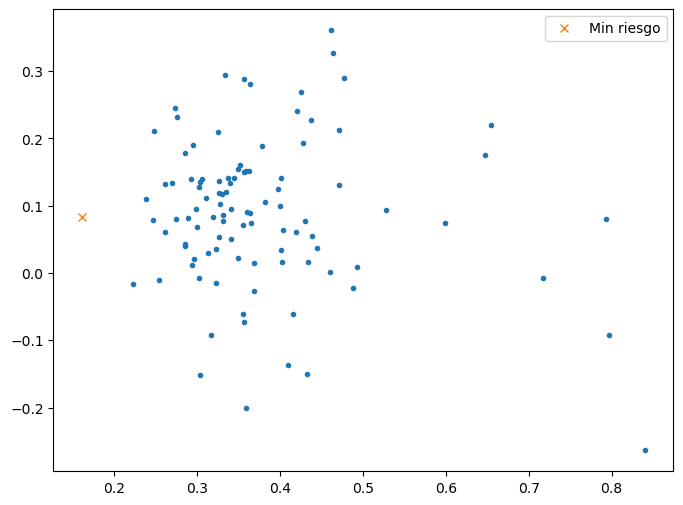

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.legend()
plt.show()

In [12]:
# 3. Dibuja la frontera eficiente.
imax = np.argmax(retornos.mean())
max_riesgo = np.sqrt(matriz_cov[imax, imax])
riesgos = np.linspace(risk_min_riesgo, max_riesgo, 200)
rentabilidades = []
for risk in riesgos:
    pesos = cp.Variable(num_activos)

    rent = retornos_esperados @ pesos
    riesgo = cp.quad_form(pesos, matriz_cov)
    
    restricciones = [cp.sum(pesos) == 1,
                     pesos >= 0,
                     riesgo <= risk**2]

    objetivo = cp.Maximize(rent)

    problema = cp.Problem(objetivo, restricciones)

    resultado = problema.solve("ECOS")
    
    pesos = pesos.value
    retornos_cartera = retornos @ pesos
    rent = retornos_cartera.mean()
    rentabilidades.append(rent)
rentabilidades = np.array(rentabilidades)

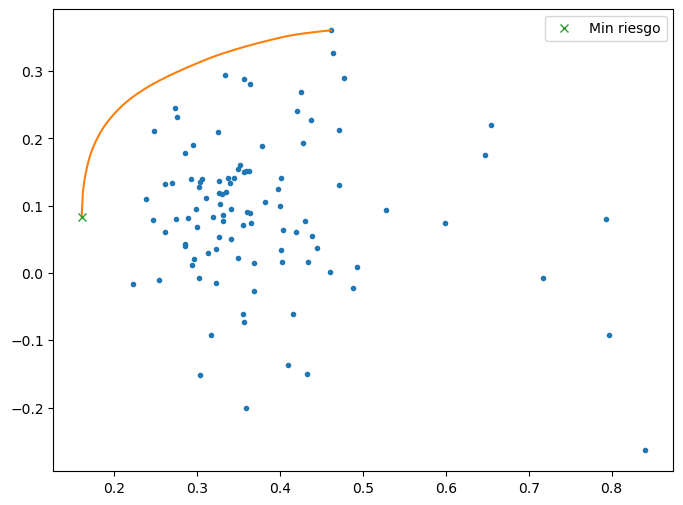

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-')
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.legend()
plt.show()

In [14]:
# 4. Calcula la cartera con riesgo máximo del 17% anual.
riesgo_objetivo = 0.17 / np.sqrt(252)

pesos = cp.Variable(num_activos)

rent = retornos_esperados @ pesos
riesgo = cp.quad_form(pesos, matriz_cov)

restricciones = [cp.sum(pesos) == 1,
                 pesos >= 0,
                 riesgo <= riesgo_objetivo**2]

objetivo = cp.Maximize(rent)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve("ECOS")


In [15]:
pesos_e4 = pesos.value
pesos_e4[pesos_e4 <= 1e-4] = 0

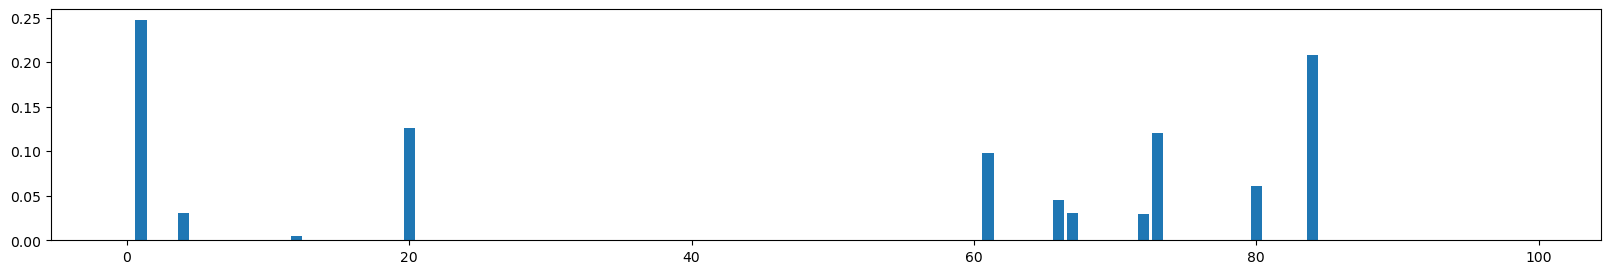

In [16]:
plt.figure(figsize=(20, 3))
plt.bar(range(num_activos), pesos_e4)
plt.show()

In [17]:
retornos_cartera = retornos @ pesos_e4
rent_e4 = retornos_cartera.mean()
risk_e4 = retornos_cartera.std()

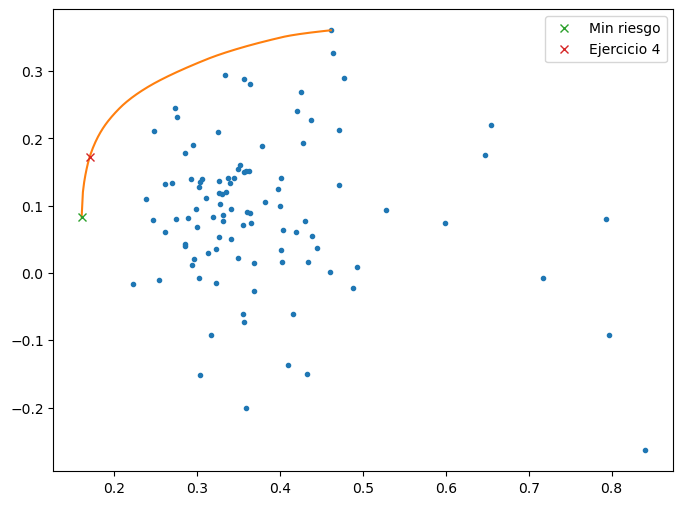

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-')
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.plot(risk_e4*np.sqrt(252), rent_e4*252, 'x', label='Ejercicio 4')
plt.legend()
plt.show()

In [19]:
# 5. Calcula la cartera con una rentabilidad del 36% anual.
rent_objetivo = 0.36 / 252

pesos = cp.Variable(num_activos)

rent = retornos_esperados @ pesos
riesgo = cp.quad_form(pesos, matriz_cov)

restricciones = [cp.sum(pesos) == 1,
                 pesos >= 0,
                 rent >= rent_objetivo]

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve("ECOS")


In [20]:
pesos_e5 = pesos.value
pesos_e5[pesos_e5 <= 1e-4] = 0

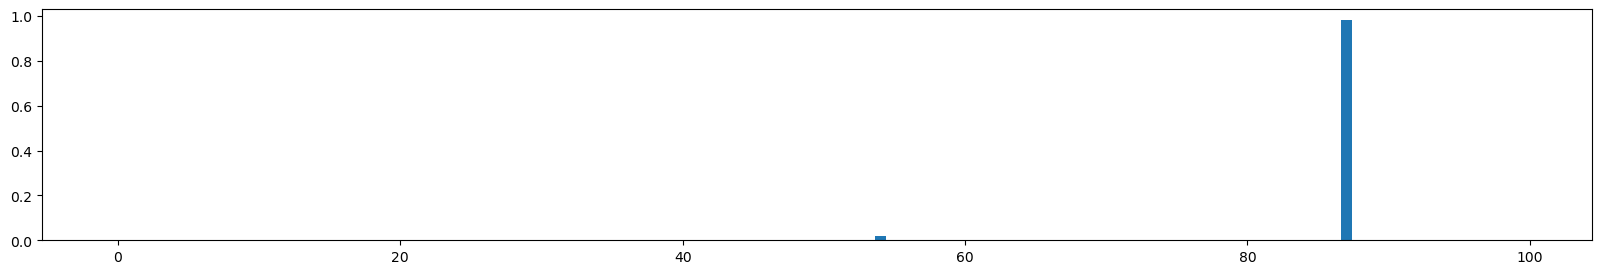

In [21]:
plt.figure(figsize=(20, 3))
plt.bar(range(num_activos), pesos_e5)
plt.show()

In [22]:
retornos_cartera = retornos @ pesos_e5
rent_e5 = retornos_cartera.mean()
risk_e5 = retornos_cartera.std()

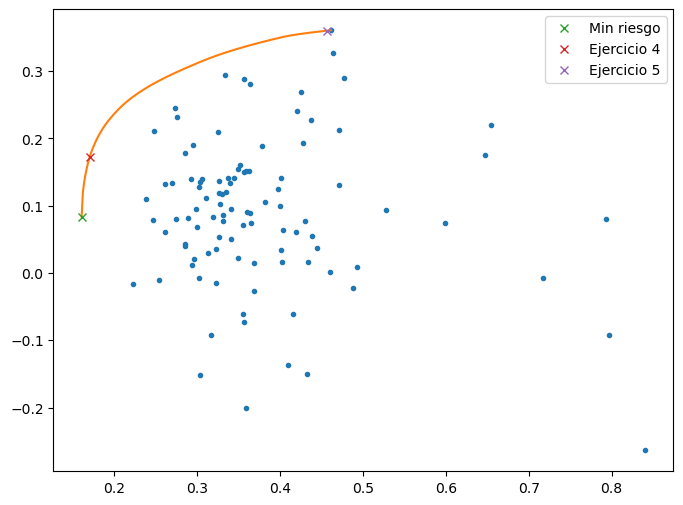

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-')
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.plot(risk_e4*np.sqrt(252), rent_e4*252, 'x', label='Ejercicio 4')
plt.plot(risk_e5*np.sqrt(252), rent_e5*252, 'x', label='Ejercicio 5')
plt.legend()
plt.show()

In [24]:
# 6. Si introduces el activo libre de riesgo con una rentabilidad del 1% anual, calcula de 
#    nuevo la cartera con una rentabilidad del 36% anual. Compara el riesgo de 
#    la nueva cartera con la cartera anterior. ¿Qué ha pasado?
rf = 0.01 / 252

x = cp.Variable(num_activos)
pesos = x / x.sum()

pi = retornos_esperados - rf

restricciones = [pi @ x == 1,
                 x >= 0]

riesgo = cp.quad_form(x, matriz_cov)

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve("ECOS")

In [25]:
pesos_sharpe = pesos.value
pesos_sharpe[pesos_sharpe <= 1e-4] = 0

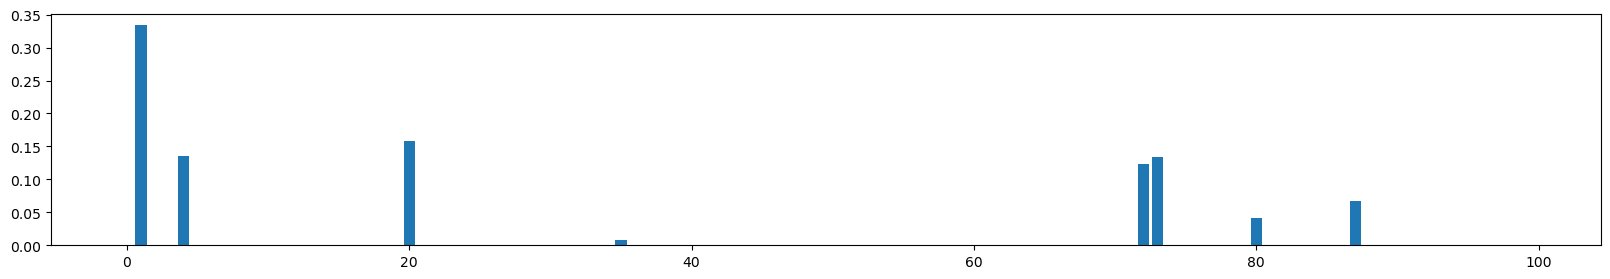

In [26]:
plt.figure(figsize=(20, 3))
plt.bar(range(num_activos), pesos_sharpe)
plt.show()

In [27]:
retornos_cartera = retornos @ pesos_sharpe
rent_sharpe = retornos_cartera.mean()
risk_sharpe = retornos_cartera.std()

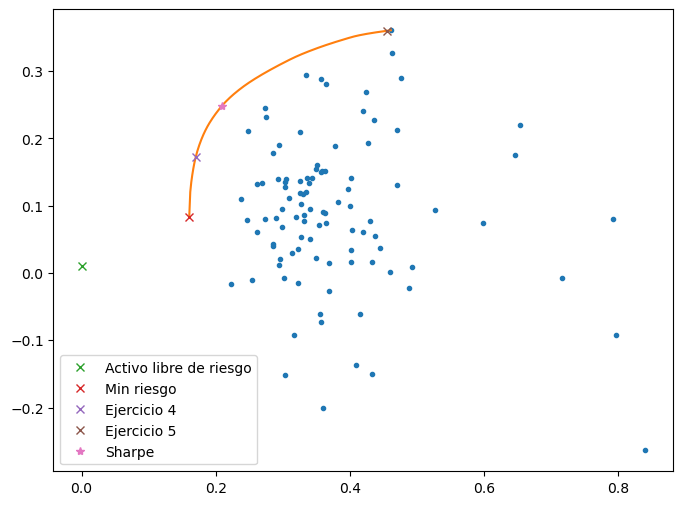

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-')
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo")
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.plot(risk_e4*np.sqrt(252), rent_e4*252, 'x', label='Ejercicio 4')
plt.plot(risk_e5*np.sqrt(252), rent_e5*252, 'x', label='Ejercicio 5')
plt.plot(risk_sharpe*np.sqrt(252), rent_sharpe*252, '*', label="Sharpe")
plt.legend()
plt.show()

In [29]:
rent_objetivo = 0.36 / 252
w = (rent_objetivo - rent_sharpe) / (rf - rent_sharpe)
risk_objetivo = (1 - w) * risk_sharpe

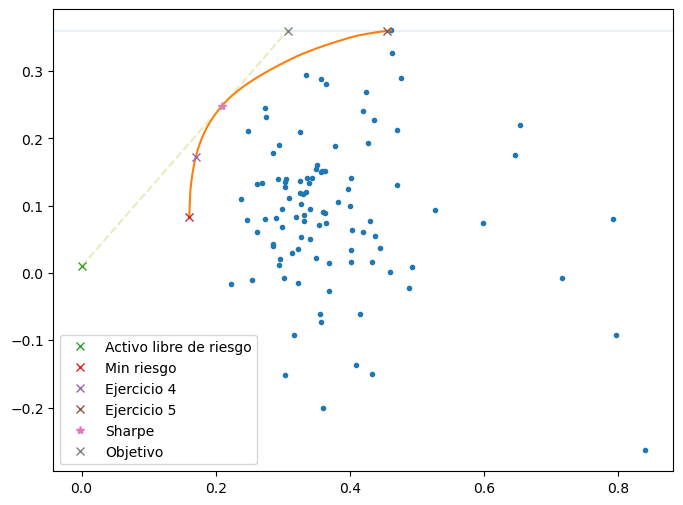

In [30]:
# 7. Dibuja todo el procedimiento y explícalo.

plt.figure(figsize=(8, 6))
plt.plot(retornos.std()*np.sqrt(252), retornos.mean()*252, '.')
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-')
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo")
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.plot(risk_e4*np.sqrt(252), rent_e4*252, 'x', label='Ejercicio 4')
plt.plot(risk_e5*np.sqrt(252), rent_e5*252, 'x', label='Ejercicio 5')
plt.plot(risk_sharpe*np.sqrt(252), rent_sharpe*252, '*', label="Sharpe")
plt.plot(risk_objetivo*np.sqrt(252), rent_objetivo*252, 'x', label="Objetivo")
plt.axhline(rent_e5*252, alpha=0.1)
plt.plot([0, risk_objetivo*np.sqrt(252)], [rf*252, rent_objetivo*252], '--', alpha=0.3)
plt.legend()
plt.show()